### **Fundamentos-analitica-II**
FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS APLICADAS
 
MAESTRÍA EN CIENCIA DE DATOS

TIC 60153 – Fundamentos de analítica II

*PROYECTO DE PRONOSTICO DE PSA PARA PACIENTES ENTRE 48 Y 60 AÑOS*

GRUPO:
- Esteban Ordoñez
- Raul Echeverry
- Fabian Salazar Figueroa
    

__________________________

### **Descripción**

Contexto de negocio.

El cáncer de próstata es uno de los tipos de cáncer más comunes en hombres. La detección temprana es crucial para mejorar las tasas de supervivencia. La prueba de antígeno prostático específico (PSA) puede ayudar a detectar el cáncer de próstata en etapas tempranas, cuando es más tratable. Sin embargo, el PSA no es específico para el cáncer de próstata y puede estar elevado en otras condiciones como prostatitis o hiperplasia prostática benigna (HPB).

El antígeno prostático específico (PSA) es una proteína producida por células normales y malignas de la glándula prostática. La prueba del PSA mide el nivel de esta proteína en la sangre y es uno de los métodos más utilizados para el tamizaje del cáncer de próstata.

La EPS SaludPorTi, está interesado en priorizar la toma de está prueba, aumentando la demanda y detención temprana del Cáncer de Próstata.

Problema de negocio
La empresa ha decidido contratarlos para que construyan un modelo predictivo que permita estimar la probabilidad de que un usuario entre 48 y 60 años de edad presente resultados anormales de PSA.


Contexto analítico

Se espera que entrene diferentes familias de modelos predictivos de clasificación (SVC con diferentes kernels, Redes Neuronales poco profundas), precedidos por diferentes procesos de transformación (normalizaciones, imputación, feature engineering, dummificación, PCA, selección de features).


La evaluación de la calidad de los flujos de modelos predictivos se debe estimar utilizando la métrica de ROC_AUC.

Expliquen sus ideas, el por qué realizan las acciones, y comenten los resultados obtenidos; se espera mucho más que unos bloques de código.
La toma de decisiones sobre los datos se debe hacer considerando el contexto del problema y de los datos, no se puede ver todo solamente desde los ojos de los datos, sino también considerar el negocio.
Un Científico de Datos debe poder comunicar los puntos importantes de su trabajo en un lenguaje universal para todos los públicos.
Todo esto se considerará en la nota.

### **Cita**

@misc{fa-ii-2024-ii-flujos-de-modelos-tradicionales,
    author = {Daniel Osorio, JavierDiaz},
    title = {FA II 2024-II: flujos de modelos tradicionales},
    publisher = {Kaggle},
    year = {2024},
    url = {https://kaggle.com/competitions/fa-ii-2024-ii-flujos-de-modelos-tradicionales}
}

_________________________________________________________________________________________________________________________________________________________________________________________

### **Flujo de trabajo completo y detallado**
**1.	Definición del problema y objetivos del negocio**
- Definir el objetivo clave: predecir si un paciente entre 48 y 60 años tendrá un resultado anormal de PSA, ayudando a priorizar las pruebas para una detección temprana del cáncer de próstata.

**2.	Análisis exploratorio de datos (EDA)**
- Revisar la distribución de las variables.
- Verificar la correlación entre las características.
- Detectar valores faltantes, outliers, y estudiar las relaciones de las características con la variable objetivo.
- Explorar diferencias entre las clases objetivo (PSA normal vs anormal).

**3.	Preprocesamiento de datos**
- Imputar valores faltantes.
- Escalar las variables numéricas (normalización o estandarización).
- Codificar las variables categóricas mediante dummificación (One-Hot Encoding).
- Considerar técnicas como reducción de dimensionalidad (PCA) si es necesario.
- Crear un pipeline de preprocesamiento para que los datos estén listos para usarse en los modelos.

**4.	Selección de modelos iniciales**
- Probar diferentes familias de modelos de clasificación:
    - **Support Vector Classifier (SVC)** con diferentes kernels (linear, rbf, poly).
    - Otros modelos iniciales como **Redes Neuronales** poco profundas (que implementaremos más adelante).
- Comparar su rendimiento inicial usando métricas como **ROC-AUC**.
    
**5.	Optimización de hiperparámetros (Optimización Bayesiana)**
- Optimizar los hiperparámetros del modelo, como C, gamma para SVC y n_components para PCA usando optimización bayesiana.
- Ajustar los modelos para maximizar su rendimiento, evaluando en cada iteración con **validación cruzada**.

**6.	Evaluación de los modelos optimizados**
- 6.1 Visualización de las curvas ROC para los modelos optimizados:
    - Aquí incluimos la visualización de las curvas ROC para los modelos optimizados (SVC con PCA) y comparamos su rendimiento.
    - Calcular el área bajo la curva (AUC) para comparar el rendimiento de los diferentes modelos en términos de sensibilidad y especificidad.
- 6.2 Comparación con otros modelos adicionales (redes neuronales poco profundas):
    - Añadir un modelo de redes neuronales poco profundas (MLPClassifier) y comparar su curva ROC con los otros modelos.
    - Realizar una comparación directa en términos de **ROC-AUC**.

**7.	Interpretación de resultados y recomendaciones**
- Interpretar los resultados de los modelos, incluyendo las métricas clave como ROC-AUC y la importancia de las características (en el caso del modelo SVC, a través de los vectores soporte o coeficientes).
- Seleccionar el mejor modelo en base a las métricas y explicar cómo este modelo puede ser implementado en la práctica para priorizar las pruebas de PSA.

**8.	Conclusiones y comunicación**
- Resumir los hallazgos clave para diferentes audiencias (tanto técnicas como no técnicas).
- Presentar recomendaciones basadas en el análisis y los resultados de los modelos para la toma de decisiones empresariales.

_____________________________

### **1. Definición del problema y objetivos del negocio**

**Objetivo:** Desarrollar un modelo de clasificación que prediga si un paciente entre 48 y 60 años tendrá un nivel anormal de PSA. Esto es clave para priorizar las pruebas y detectar el cáncer de próstata en etapas tempranas.

- **Predicción:** Etiqueta binaria, con resultados normales (0) o anormales (1) en la prueba de PSA.
- **Métrica de evaluación:** ROC-AUC, dado que queremos balancear entre los falsos positivos y falsos negativos.

### **Librerías a básicas utilizar**

In [2]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline
# Librería para el manejo de expresiones regulares
import re

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization


import warnings
warnings.filterwarnings("ignore")


### **Lectura de datos**

In [3]:
df_train = pd.read_parquet(r"https://github.com/alfa7g7/Fundamentos-analitica-II/raw/refs/heads/main/UNIDAD%20II/Data/df_train.parquet")
print(df_train.shape)
df_train.head()

(23494, 46)


,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,1,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,13728.714286,-27375.666667,4.134967e+04


In [4]:
df_test = pd.read_parquet(r"https://github.com/alfa7g7/Fundamentos-analitica-II/raw/refs/heads/main/UNIDAD%20II/Data/df_test.parquet")
print(df_test.shape)
df_test.head()

(10069, 45)


,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
12596,2.0,4.0,2.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,5.421180e+06,-1.256617e+07,9.611937e+06
29326,4.0,0.0,1.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-9.504343e+03,5.997787e+04,8.013800e+04
24338,0.0,0.0,1.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,2.477143e+03,-5.780000e+03,1.734000e+04
11167,1.0,0.0,0.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,1,0,1,0,1,0,0,3.597143e+03,-8.393333e+03,2.518000e+04
22074,36.0,0.0,1.0,3,0.666667,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,-9.042514e+03,6.309881e+05,5.993393e+05


In [28]:
#pasar a csv para análisis campesino
#df.to_csv(r"C:\Users\alfa7\OneDrive\Documentos\ICESI\MAESTRIA CIENCIA DE DATOS\2do semestre\Fundamentos de analitica II\Unidad II\Proyecto PSA\Data\df_train.csv")
#df1.to_csv(r"C:\Users\alfa7\OneDrive\Documentos\ICESI\MAESTRIA CIENCIA DE DATOS\2do semestre\Fundamentos de analitica II\Unidad II\Proyecto PSA\Data\df_test.csv")

### **2. Análisis Explotarorio de Datos**

El análisis exploratorio nos ayudará a comprender mejor el conjunto de datos, incluyendo:

- Distribución de la variable objetivo (PSA normal vs anormal).
- Características demográficas (edad, estado de salud general, historial médico).
- Visualización de correlaciones entre las características y el resultado de PSA.
- Outliers y valores faltantes en las variables predictoras.

In [20]:
# Revisamos las dimensiones del conjunto de datos  
rows, col = df_train.shape
print ("Dimensiones del conjunto de datos: {}" . format (df_train.shape))
print ('Filas:', rows, '\nColumnas:', col)

Dimensiones del conjunto de datos: (23494, 46)
Filas: 23494 
Columnas: 46


In [5]:
# Información acerca del dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23494 entries, 16484 to 9409
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   23494 non-null  float64
 1   MEDICINA ESPECIALIZADA         23494 non-null  float64
 2   MEDICINA GENERAL               23494 non-null  float64
 3   Cant_gr_flia                   23494 non-null  int64  
 4   Cant_riesgos_flia_mean         23494 non-null  float64
 5   min_Tiempo_CP_Fliar            8 non-null      float64
 6   Cant_Fliar_CP                  23494 non-null  float64
 7   psa_max_gr_flia                164 non-null    float64
 8   psa_min_gr_flia                164 non-null    float64
 9   Cant_Fliar_riesgos             23494 non-null  float64
 10  cantidad_serv_flia             23494 non-null  float64
 11  Pendiente_flia                 23494 non-null  float64
 12  Intercepto_flia                23494 non-null  f

In [6]:
df_train.dtypes

MEDICAMENTOS                     float64
MEDICINA ESPECIALIZADA           float64
MEDICINA GENERAL                 float64
Cant_gr_flia                       int64
Cant_riesgos_flia_mean           float64
min_Tiempo_CP_Fliar              float64
Cant_Fliar_CP                    float64
psa_max_gr_flia                  float64
psa_min_gr_flia                  float64
Cant_Fliar_riesgos               float64
cantidad_serv_flia               float64
Pendiente_flia                   float64
Intercepto_flia                  float64
Promedio_costo_flia              float64
ESTADO_CIVI                       object
PROGRAMA                          object
estrato                           object
IMC                               object
AGRUPACION_SISTOLICA              object
AGRUPACION_DIASTOLICA             object
parentesco                        object
EDAD                             float64
RIESGOS                          float64
CANTIDAD_SERVICIOS               float64
PERDIDA_DE_PESO 

In [7]:
df_train.describe()

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,RIESGOS,CANTIDAD_SERVICIOS,PERDIDA_DE_PESO,TIEMPO_ULTIMA_CITA,conteo_dx_diferentes,TIEMPO_AFILIACION,Target,Pendiente,Intercepto,Promedio_costo
count,23494.000000,23494.000000,23494.000000,23494.000000,23494.000000,8.000000,23494.000000,164.000000,164.000000,23494.000000,...,7211.000000,23494.000000,5771.000000,23494.000000,23494.000000,23494.000000,23494.000000,2.349400e+04,2.349400e+04,2.349400e+04
mean,5.201669,1.285094,1.244190,2.451392,0.227974,95.000000,0.000341,8.538970,2.986841,0.291947,...,1.492997,8.861156,0.170005,2.219928,2.918532,135.953520,0.284626,1.485093e+04,1.495688e+05,3.107291e+05
std,8.830948,2.669005,1.337775,1.153336,0.485658,86.194133,0.018450,44.400913,4.734082,0.454761,...,0.792335,12.090472,8.040427,3.991257,2.193799,104.881494,0.451246,4.270672e+05,1.854731e+06,1.424497e+06
min,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,0.000000,0.005000,0.000000,0.000000,...,1.000000,1.000000,-62.500000,1.000000,1.000000,7.000000,0.000000,-2.030057e+07,-3.337852e+07,1.000000e+00
25%,0.000000,0.000000,0.000000,2.000000,0.000000,41.000000,0.000000,0.978750,0.845750,0.000000,...,1.000000,2.000000,-2.560000,1.000000,1.000000,38.000000,0.000000,-4.412050e+03,-1.678853e+04,3.267192e+04
50%,2.000000,0.000000,1.000000,2.000000,0.000000,73.000000,0.000000,2.420000,1.785000,0.000000,...,1.000000,5.000000,0.000000,1.000000,2.000000,103.000000,0.000000,3.118857e+03,4.090667e+03,7.961250e+04
75%,6.000000,1.000000,2.000000,3.000000,0.333333,102.250000,0.000000,4.995000,3.552500,1.000000,...,2.000000,11.000000,2.270000,2.000000,4.000000,244.000000,1.000000,1.459710e+04,7.573733e+04,1.793700e+05
max,91.000000,44.000000,23.000000,10.000000,6.000000,284.000000,1.000000,550.000000,49.000000,2.000000,...,8.000000,262.000000,157.140000,36.000000,25.000000,350.000000,1.000000,1.490708e+07,1.013168e+08,9.516344e+07


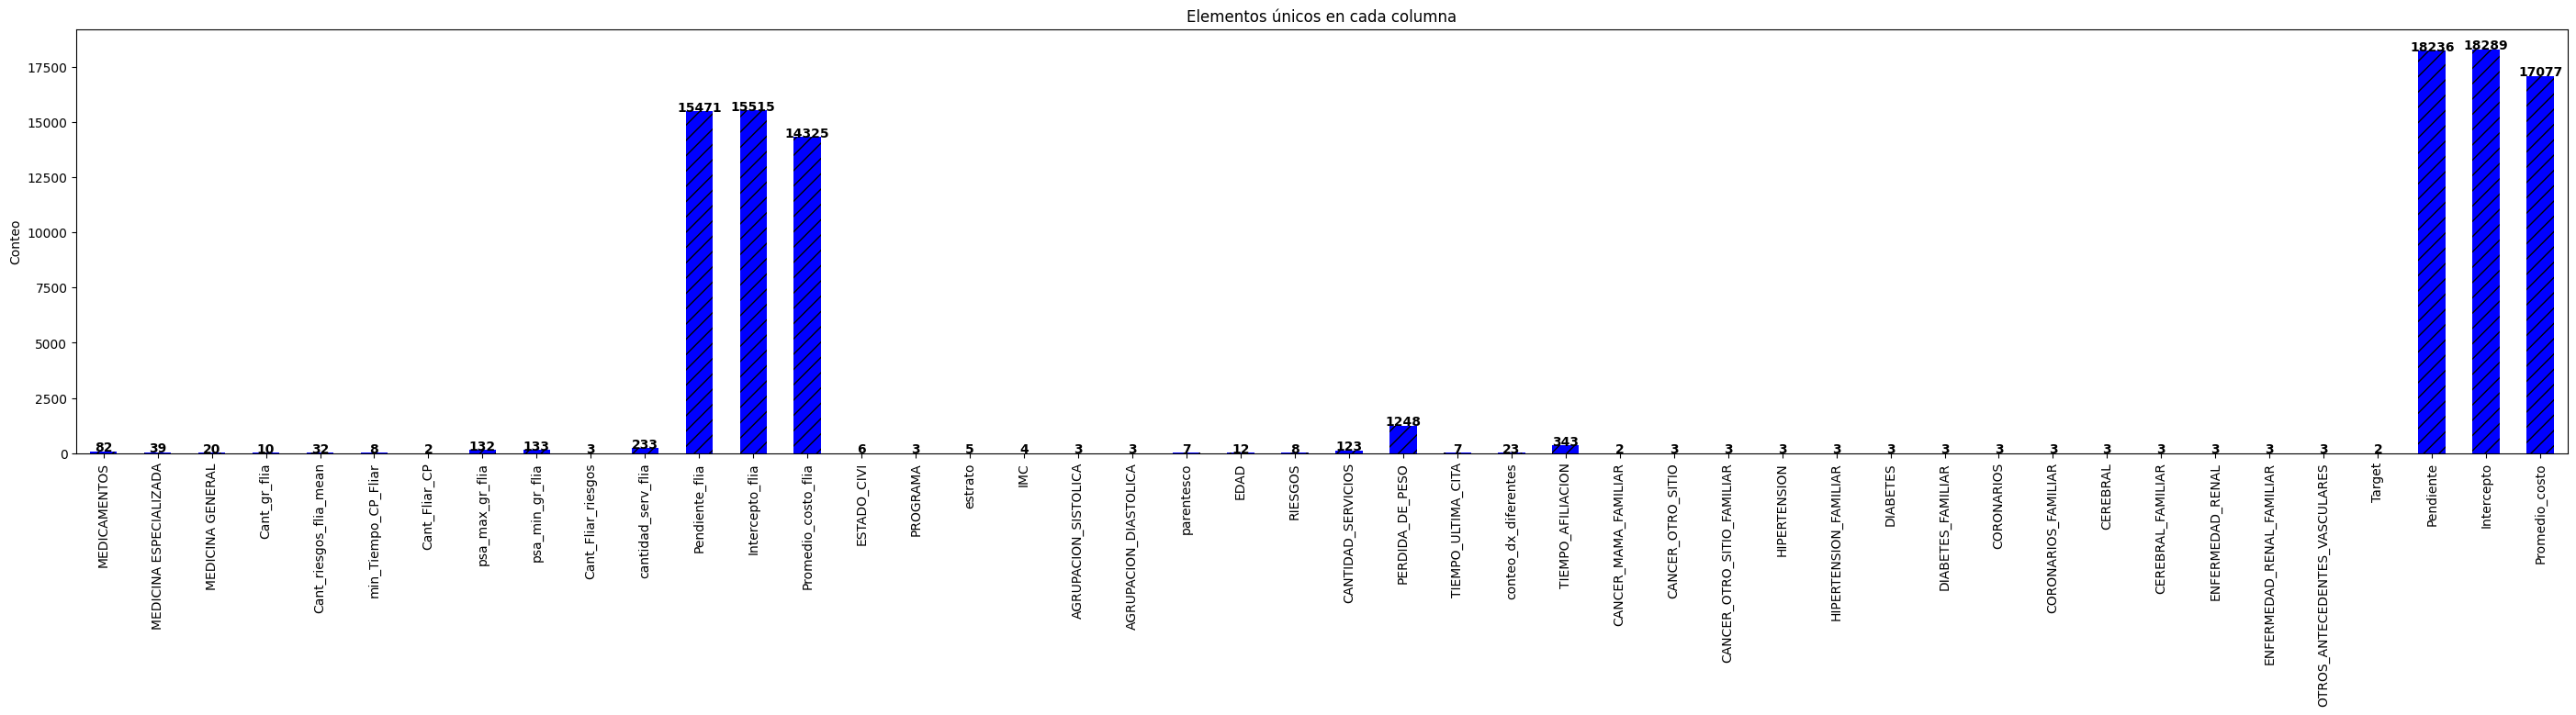

In [17]:
unique = df_train.nunique()
plt.figure(figsize=(35, 6))
unique.plot(kind='bar', color='blue', hatch='//')
plt.title('Elementos únicos en cada columna')
plt.ylabel('Conteo')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')
plt.show()

Revisamos los datos faltantes mediante un mapa de calor

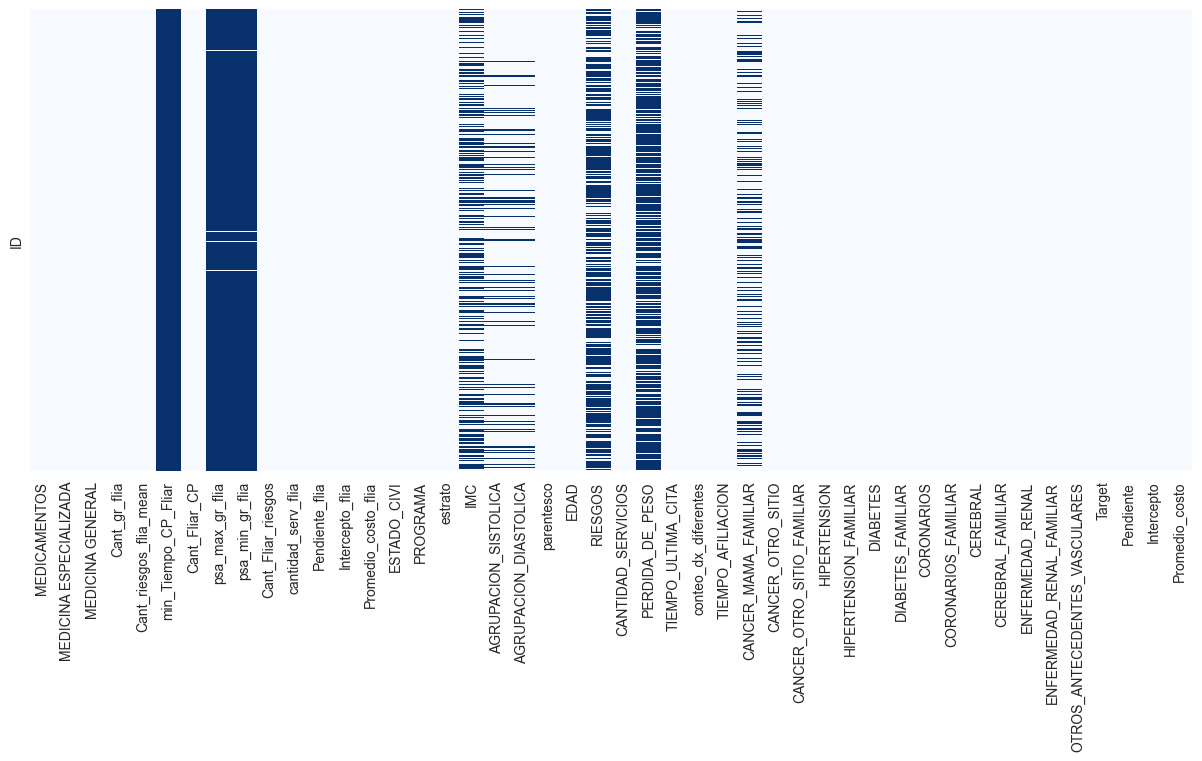

In [42]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes
plt.figure(figsize=(15,6))
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [40]:
df_train.isnull().sum()

MEDICAMENTOS                         0
MEDICINA ESPECIALIZADA               0
MEDICINA GENERAL                     0
Cant_gr_flia                         0
Cant_riesgos_flia_mean               0
min_Tiempo_CP_Fliar              23486
Cant_Fliar_CP                        0
psa_max_gr_flia                  23330
psa_min_gr_flia                  23330
Cant_Fliar_riesgos                   0
cantidad_serv_flia                   0
Pendiente_flia                       0
Intercepto_flia                      0
Promedio_costo_flia                  0
ESTADO_CIVI                          0
PROGRAMA                             0
estrato                              0
IMC                              10364
AGRUPACION_SISTOLICA              3320
AGRUPACION_DIASTOLICA             3320
parentesco                           0
EDAD                                 0
RIESGOS                          16283
CANTIDAD_SERVICIOS                   0
PERDIDA_DE_PESO                  17723
TIEMPO_ULTIMA_CITA       

Cada columna tiene 23494 regsitros y de las 46(45 independientes y 1 dependiente), tenemos 9 con datos faltantes o nulos.

- min_Tiempo_CP_Fliar              23486 faltantes
- psa_max_gr_flia                  23330 faltantes
- psa_min_gr_flia                  23330 faltantes
- IMC                              10364 faltantes
- AGRUPACION_SISTOLICA              3320 faltantes
- AGRUPACION_DIASTOLICA             3320 faltantes
- RIESGOS                          16283 faltantes
- PERDIDA_DE_PESO                  17723 faltantes
- CANCER_MAMA_FAMILIAR              6802 faltantes



In [64]:
"""
from sklearn.base import BaseEstimator, TransformerMixin

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, custom_values):
        self.custom_values = custom_values  # Diccionario con las columnas y los valores específicos para imputar

    def fit(self, X, y=None):
        return self  # No es necesario ajustar nada aquí

    def transform(self, X, y=None):
        result = X.copy()
        for column, value in self.custom_values.items():
            result[column].fillna(value, inplace=True)  # Imputar valor específico
        return result
"""

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, custom_values):
        self.custom_values = custom_values  # Diccionario con los índices de las columnas y valores específicos

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for idx, value in self.custom_values.items():
            result.iloc[:, idx].fillna(value, inplace=True)  # Imputar valor específico usando el índice
        return result

In [65]:
# Definir los valores específicos para las columnas que deseas imputar manualmente
"""
custom_values = {
    #'columna1': 'valor_especifico1',  # Ejemplo de imputación en una columna categórica
    #'columna2': 0,                    # Ejemplo de imputación numérica
    
    'CANCER_MAMA_FAMILIAR': '2', # Agregamos una categoria 2 que indique que el valor no se evidencia.
    'RIESGOS': 0, # los valores nulos corresponden a que aun no se les ha identifcado algun riesgo, por lo tanto, se pueden marcar con 0 (cero) riesgos. 
}
"""
custom_values = {
    #0: 'valor_especifico1',  # Primera columna (índice 0)
    #1: 0,                    # Segunda columna (índice 1)
    #2: 'valor_especifico3'    # Tercera columna (índice 2)
    28: '2', # CANCER_MAMA_FAMILIAR, agregamos una categoria 2 que indique que el valor no se evidencia.
    22: 0 # RIESGOS, los valores nulos corresponden a que aun no se les ha identifcado algun riesgo, por lo tanto, se pueden marcar con 0 (cero) riesgos.    
}

# Transformador personalizado para imputar valores específicos
custom_imputer = CustomImputer(custom_values=custom_values)

In [66]:
# Aplicar el imputador en un DataFrame
df_imputed2 = custom_imputer.fit_transform(df_train)

In [67]:
df_imputed2.isnull().sum()

MEDICAMENTOS                         0
MEDICINA ESPECIALIZADA               0
MEDICINA GENERAL                     0
Cant_gr_flia                         0
Cant_riesgos_flia_mean               0
min_Tiempo_CP_Fliar              23486
Cant_Fliar_CP                        0
psa_max_gr_flia                  23330
psa_min_gr_flia                  23330
Cant_Fliar_riesgos                   0
cantidad_serv_flia                   0
Pendiente_flia                       0
Intercepto_flia                      0
Promedio_costo_flia                  0
ESTADO_CIVI                          0
PROGRAMA                             0
estrato                              0
IMC                              10364
AGRUPACION_SISTOLICA              3320
AGRUPACION_DIASTOLICA             3320
parentesco                           0
EDAD                                 0
RIESGOS                              0
CANTIDAD_SERVICIOS                   0
PERDIDA_DE_PESO                  17723
TIEMPO_ULTIMA_CITA       

Separamos características categóricas y numéricas

In [21]:
num_cols = pd.DataFrame (df_train, columns= df_train.select_dtypes(include=['int64','float64']).columns)
cat_cols = pd.DataFrame (df_train, columns= df_train.select_dtypes(include=['object']).columns)

Implementamos una función que nos permite dibujar nuestros diagramas de cajas y bigotes haciendo especial énfasis en el sesgo de la distribución y los datos atípicos

In [37]:
def plot_numerical_features_boxplots(data, columns_list, rows, cols, title):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(rows, cols, figsize=(30, 14), sharey=True)
    fig.suptitle(title, fontsize=25, y=1)
    axs = axs.flatten()
    outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])
    for i, col in enumerate(columns_list):
        sns.boxplot(x=data[col], color='#404B69', ax=axs[i])
        axs[i].set_title(f'{col} (sesgo: {data[col].skew().round(2)})', fontsize=12)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outliers_index = data[outliers].index.tolist()
        outliers_values = data[col][outliers].tolist()
        outliers_df = pd.concat([outliers_df,pd.DataFrame({'Column': col, 'Outlier_index': outliers_index, 'Outlier_values': outliers_values})], ignore_index=True)
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Atípicos: {outliers.sum()}')
        axs[i].legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    return outliers_df

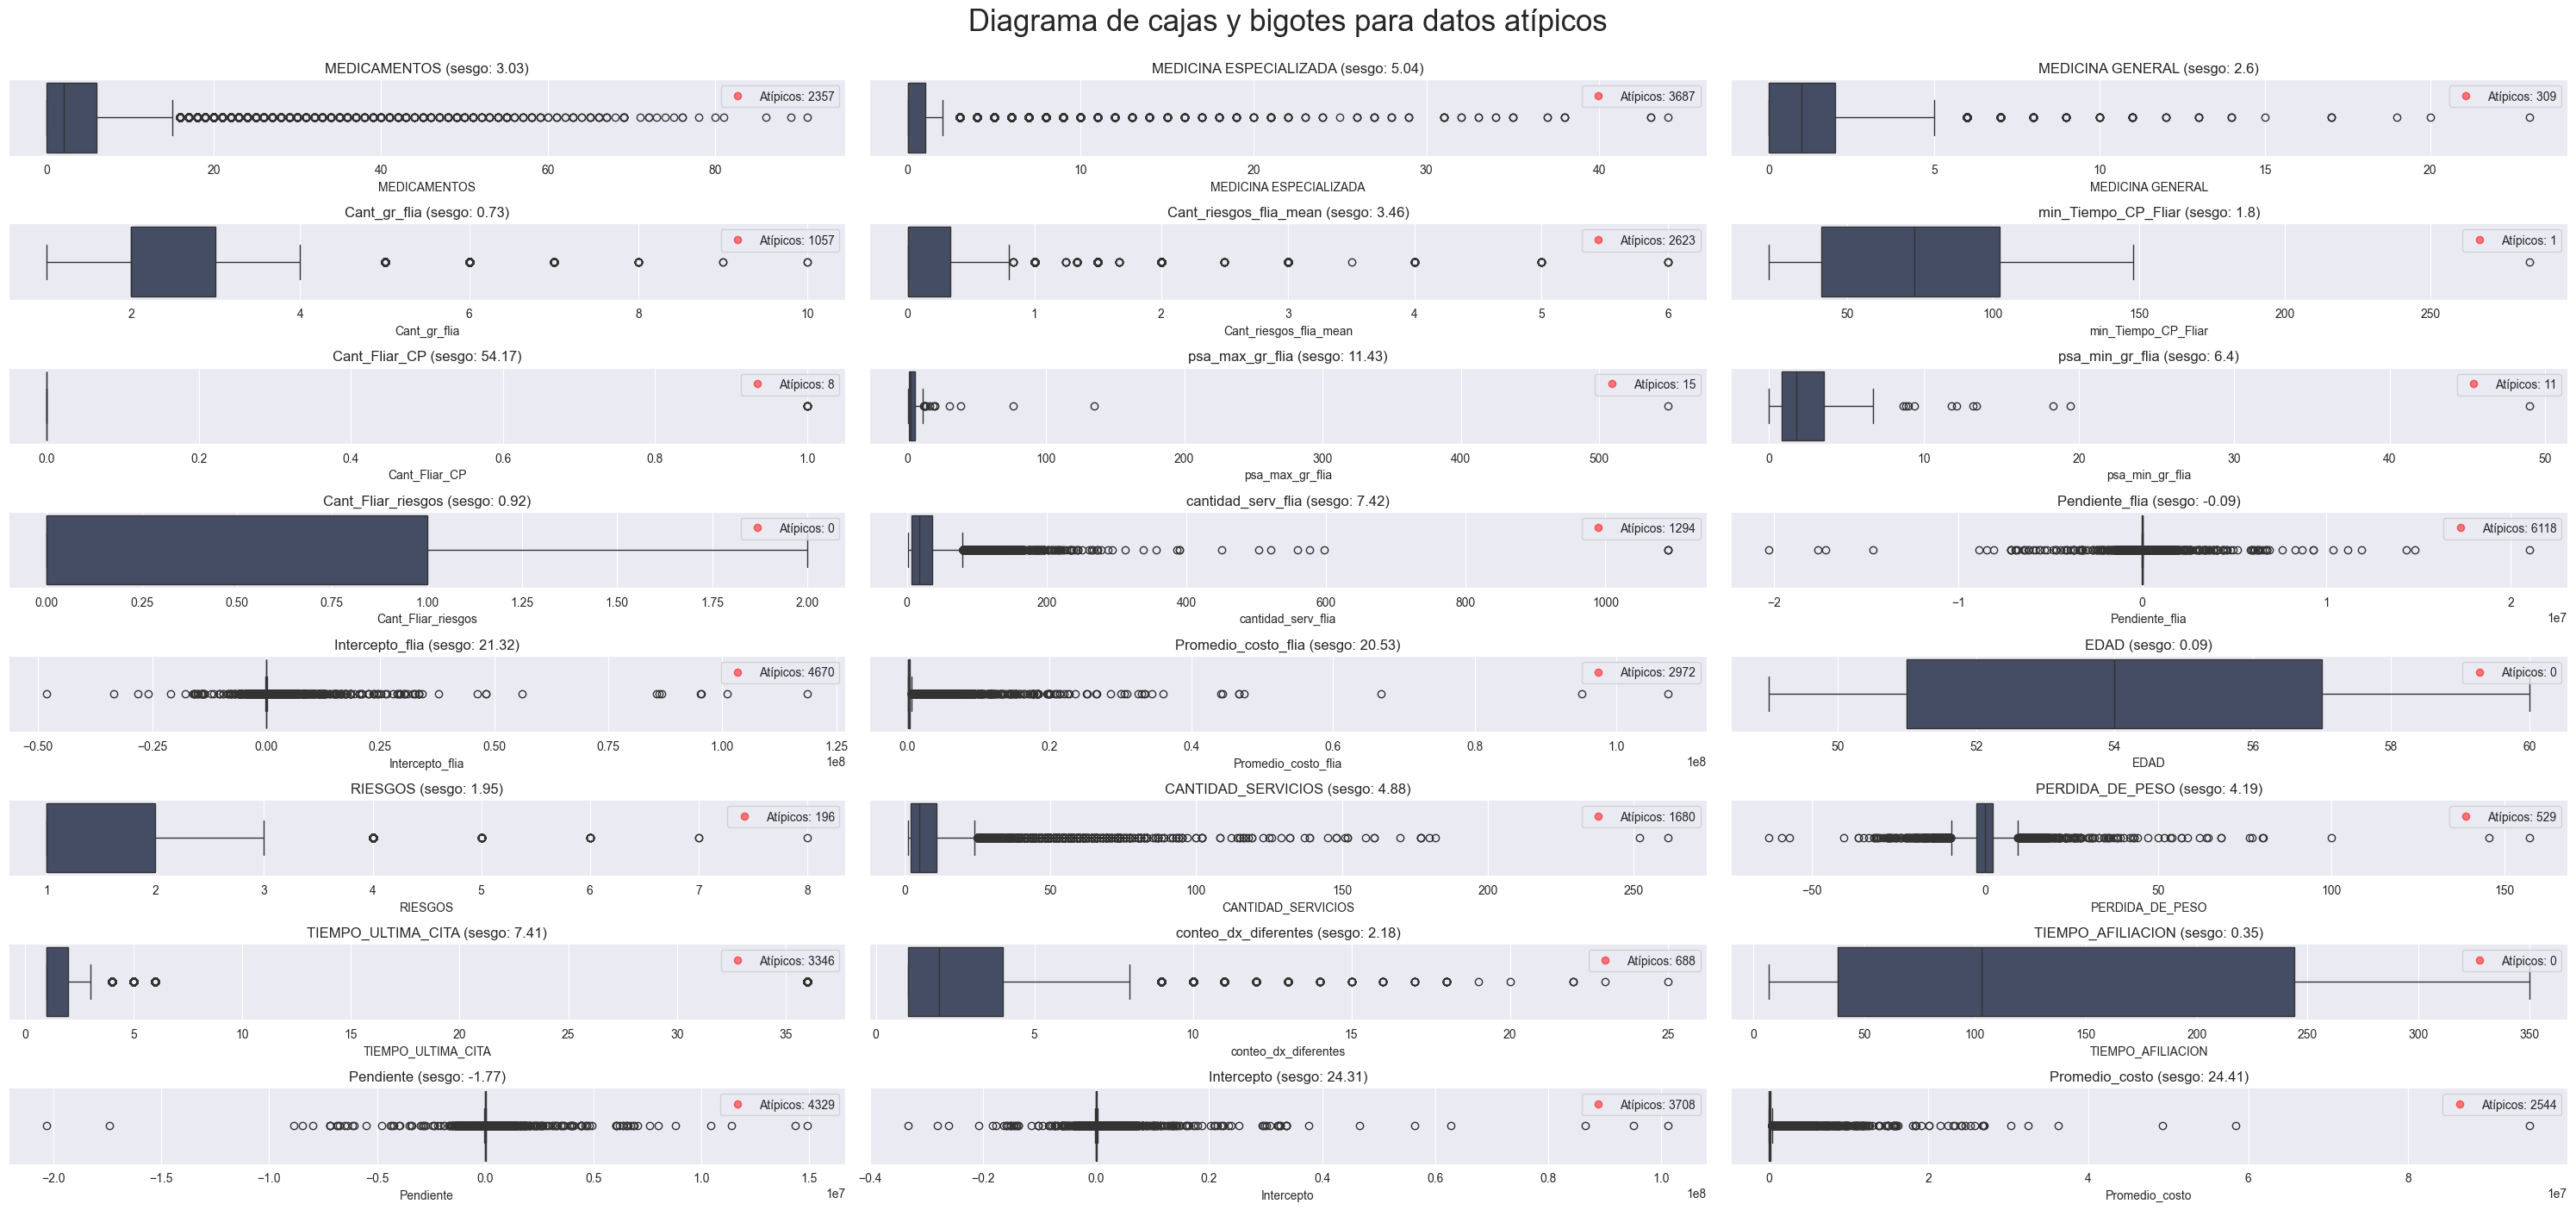

In [38]:
outliers_df = plot_numerical_features_boxplots(data=df_train, columns_list=num_cols, rows=8, cols=3, title='Diagrama de cajas y bigotes para datos atípicos')

In [39]:
outliers_df

,Column,Outlier_index,Outlier_values
0,MEDICAMENTOS,11653,2.000000e+01
1,MEDICAMENTOS,29184,1.700000e+01
2,MEDICAMENTOS,3980,2.400000e+01
3,MEDICAMENTOS,4801,1.900000e+01
4,MEDICAMENTOS,7765,2.800000e+01
...,...,...,...
42137,Promedio_costo,32003,8.635533e+05
42138,Promedio_costo,13267,5.904770e+05
42139,Promedio_costo,21333,5.104048e+05
42140,Promedio_costo,4792,1.852966e+06


### **3. Preprocesamiento de datos**

En esta fase, se procesarán los datos para que puedan ser usados en modelos de machine learning:
- **Formato de variables:** Se dará un formato común a todas las variables. Por Ejemplo, quitar espacios, definir todo en minúscula y completar palabras incompletas.
- **Imputación de valores faltantes:** Si hay datos faltantes, es importante decidir cómo imputarlos. Por ejemplo, podemos usar la media, mediana o algún método más sofisticado.
- **Escalado o normalización de las variables:** Modelos como el SVC son sensibles a la escala de los datos, por lo que aplicaremos normalización (MinMaxScaler o StandardScaler) para las variables numéricas.
- **Codificación de variables categóricas:** Si existen variables categóricas, usaremos dummificación (One-Hot Encoding).
- **Ingeniería de características (feature engineering):** Creación de nuevas variables, como combinaciones de otras o transformaciones (por ejemplo, logaritmos en variables sesgadas).
- **Reducción de dimensionalidad (PCA):** En caso de que tengamos muchas características, podríamos usar PCA para reducir el número de dimensiones, manteniendo la mayor parte de la varianza de los datos.

In [5]:
df_train.columns

Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Cant_Fliar_CP', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'Cant_Fliar_riesgos', 'cantidad_serv_flia', 'Pendiente_flia',
       'Intercepto_flia', 'Promedio_costo_flia', 'ESTADO_CIVI', 'PROGRAMA',
       'estrato', 'IMC', 'AGRUPACION_SISTOLICA', 'AGRUPACION_DIASTOLICA',
       'parentesco', 'EDAD', 'RIESGOS', 'CANTIDAD_SERVICIOS',
       'PERDIDA_DE_PESO', 'TIEMPO_ULTIMA_CITA', 'conteo_dx_diferentes',
       'TIEMPO_AFILIACION', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO',
       'CANCER_OTRO_SITIO_FAMILIAR', 'HIPERTENSION', 'HIPERTENSION_FAMILIAR',
       'DIABETES', 'DIABETES_FAMILIAR', 'CORONARIOS', 'CORONARIOS_FAMILIAR',
       'CEREBRAL', 'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL',
       'ENFERMEDAD_RENAL_FAMILIAR', 'OTROS_ANTECEDENTES_VASCULARES', 'Target',
       'Pendiente', 'Intercepto', 'Promedio_costo'],
      dtype='object')

In [6]:
df_test.columns

Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Cant_Fliar_CP', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'Cant_Fliar_riesgos', 'cantidad_serv_flia', 'Pendiente_flia',
       'Intercepto_flia', 'Promedio_costo_flia', 'ESTADO_CIVI', 'PROGRAMA',
       'estrato', 'IMC', 'AGRUPACION_SISTOLICA', 'AGRUPACION_DIASTOLICA',
       'parentesco', 'EDAD', 'RIESGOS', 'CANTIDAD_SERVICIOS',
       'PERDIDA_DE_PESO', 'TIEMPO_ULTIMA_CITA', 'conteo_dx_diferentes',
       'TIEMPO_AFILIACION', 'CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO',
       'CANCER_OTRO_SITIO_FAMILIAR', 'HIPERTENSION', 'HIPERTENSION_FAMILIAR',
       'DIABETES', 'DIABETES_FAMILIAR', 'CORONARIOS', 'CORONARIOS_FAMILIAR',
       'CEREBRAL', 'CEREBRAL_FAMILIAR', 'ENFERMEDAD_RENAL',
       'ENFERMEDAD_RENAL_FAMILIAR', 'OTROS_ANTECEDENTES_VASCULARES',
       'Pendiente', 'Intercepto', 'Promedio_costo'],
      dtype='object')

Formateamos los nombres de las variables

In [7]:
#Damos formato a las variables dejando todo en minuscula y sin espacios
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_cols.append(re.sub(r'\s+', ' ',col.strip()).replace(' ','_').lower())
    result.columns = new_cols
    return result

*Descripciones de variables:* El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
Ejemplo:
- GRE_Score **(Ratio - Discreta)**: Puntuación en el Graduate Record Examination (GRE), un examen estandarizado utilizado para la admisión a programas de posgrado cuyo rango es desde 260 hasta 340.
- TOEFL_Score **(Ratio - Discreta)**: Puntuación en el Test of English as a Foreign Language (TOEFL), un examen estandarizado para medir la habilidad en inglés de hablantes no nativos cuyo rango es desde 0 hasta 120.
- University_Rating **(Ordinal)**: Calificación de la universidad, generalmente en una escala de 1 a 5, donde 5 es la más alta.

Falta completar---->

**agrupacion_diastolica:** Resultado Ultima Toma Tension Sistolica

**agrupacion_sistolica:** Resultado Ultima Toma Tension Diastolica

**cancer_mama_familiar:** Tienen Antecedentes De Cancer_Mama_Familiar

**cancer_otro_sitio:** El Usuario Tiene Cancer_Otro_Sitio Fuente Antecedentes

**cancer_otro_sitio_familiar:** Tienen Antecedentes De Cancer_Otro_Sitio_Familiar

**cant_fliar_cp:** Tiene Familiar con Cancer de Prostata?

**cant_fliar_riesgos:** Cantidad de riesgos del grupo Familiar

**cant_gr_flia:** Cantidad de personas en el grupo familiar

**cant_riesgos_flia_mean:** Cantidad promedio de riesgos en familia

**cantidad_serv_flia:** Cantidad de Servicios prestados a la familia en el ultimo semestre

**cantidad_servicios:** Cantidad de Servicios prestados al usuario en el ultimo semestre

**cerebral:** Ha presentado enfermedad cerebral?

**cerebral_familiar:** Tienen Antecedentes De Cerebral_Familiar

**conteo_dx_diferentes:** Cuantos Diagnosticos ha presentado en el ultimo semestre

**coronarios:** Ha presentado enfermedad coronaria?

**coronarios_familiar:** Tienen Antecedentes De Coronarios Familiar

**diabetes:** Ha presentado Diabetes?

**diabetes_familiar:** Tienen Antecedentes De Diabetes Familiar

**edad:** Edad del Usuario

**enfermedad_renal:** Ha presentado Enfermedad Renal?

**enfermedad_renal_familiar:** Tienen Antecedentes De Enfermedad Renal Familiar

**estado_civil:** Estado Civil del Usuario

**estrato:** Estrato sociodemografico del usuario

**genero:** Genero Usuario

**grupo_etareo:** Grupo Etareo

**hipertension:** Ha presentado HTA?

**hipertension_familiar:** Tienen Antecedentes De HTA Familiar

**imc:** Indice de masa corporal

**intercepto:** Intercepto del costo del ultimo semestre

**intercepto_flia:** Incercepto del costo familiar del ultimo semetre

**medicamentos:** Cantidad de medicamentos usados en el ultimo semestre

**medicina_especializada:** Cantidad de servicios de medicina especializada en el ultimo semestre

**medicina_general:** Cantidad de servicios de medicina general en el ultimo semestre

**min_tiempo_cp_fliar:** Tiempo desde la marca del CA de Prostata Familiar

**otros_antecedentes_vasculares:** Tienen Antecedentes De enfermedad vascular?

**parentesco:** Parentezco con el cotizante

**pendiente:** Pendiente del costo en el ultimo semestre

**pendiente_flia:** Pendiente del costo familiar en el ultimo semestre

**perdida_de_peso:** Peso perdido/ganado en el ultimo año

**programa:** Programa actual del usuario

**promedio_costo:** Promedio del costo en el ultimo semestre

**promedio_costo_flia:** Promedio del costo familiar en el ultimo semestre

**psa_max_gr_flia:** Resultado PSA Maximo del grupo familiar

**psa_min_gr_flia:** Resultado PSA Minimo del grupo familiar

**riesgos:** cantidad de riesgos del usuario

**target:** Resultado numerico del PSA

**target_clase:** Resultado anormal o normal del PSA

**tiempo_afiliacion:** Tiempo de afiliación del usuario

**tiempo_ultima_cita:** Tiempo desde la ultima cita del usuario

In [8]:
# Creamos un Transformer para renombrar columnas
class Rename_columns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = format_columns(result)
        result = result.rename(columns={'estado_civi':'estado_civil'}) #cambiamos el nombre a esta variable porque parece incompleto
        return result

In [9]:
# Preguntar si debo meter esto dentro del pipeline gigante de todo???
df_train_renamed = Rename_columns().fit_transform(df_train)
df_test_renamed = Rename_columns().fit_transform(df_test)

In [10]:
df_train_renamed.columns

Index(['medicamentos', 'medicina_especializada', 'medicina_general',
       'cant_gr_flia', 'cant_riesgos_flia_mean', 'min_tiempo_cp_fliar',
       'cant_fliar_cp', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'cant_fliar_riesgos', 'cantidad_serv_flia', 'pendiente_flia',
       'intercepto_flia', 'promedio_costo_flia', 'estado_civil', 'programa',
       'estrato', 'imc', 'agrupacion_sistolica', 'agrupacion_diastolica',
       'parentesco', 'edad', 'riesgos', 'cantidad_servicios',
       'perdida_de_peso', 'tiempo_ultima_cita', 'conteo_dx_diferentes',
       'tiempo_afiliacion', 'cancer_mama_familiar', 'cancer_otro_sitio',
       'cancer_otro_sitio_familiar', 'hipertension', 'hipertension_familiar',
       'diabetes', 'diabetes_familiar', 'coronarios', 'coronarios_familiar',
       'cerebral', 'cerebral_familiar', 'enfermedad_renal',
       'enfermedad_renal_familiar', 'otros_antecedentes_vasculares', 'target',
       'pendiente', 'intercepto', 'promedio_costo'],
      dtype='object')

In [11]:
df_test_renamed.columns

Index(['medicamentos', 'medicina_especializada', 'medicina_general',
       'cant_gr_flia', 'cant_riesgos_flia_mean', 'min_tiempo_cp_fliar',
       'cant_fliar_cp', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'cant_fliar_riesgos', 'cantidad_serv_flia', 'pendiente_flia',
       'intercepto_flia', 'promedio_costo_flia', 'estado_civil', 'programa',
       'estrato', 'imc', 'agrupacion_sistolica', 'agrupacion_diastolica',
       'parentesco', 'edad', 'riesgos', 'cantidad_servicios',
       'perdida_de_peso', 'tiempo_ultima_cita', 'conteo_dx_diferentes',
       'tiempo_afiliacion', 'cancer_mama_familiar', 'cancer_otro_sitio',
       'cancer_otro_sitio_familiar', 'hipertension', 'hipertension_familiar',
       'diabetes', 'diabetes_familiar', 'coronarios', 'coronarios_familiar',
       'cerebral', 'cerebral_familiar', 'enfermedad_renal',
       'enfermedad_renal_familiar', 'otros_antecedentes_vasculares',
       'pendiente', 'intercepto', 'promedio_costo'],
      dtype='object')

In [12]:
# Definir las columnas numéricas y categóricas
df_train_renamed_num = df_train_renamed.select_dtypes(include=['int64', 'float64'])
df_train_renamed_cat = df_train_renamed.select_dtypes(include=['object', 'category'])


In [13]:
df_train_renamed_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23494 entries, 16484 to 9409
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   medicamentos            23494 non-null  float64
 1   medicina_especializada  23494 non-null  float64
 2   medicina_general        23494 non-null  float64
 3   cant_gr_flia            23494 non-null  int64  
 4   cant_riesgos_flia_mean  23494 non-null  float64
 5   min_tiempo_cp_fliar     8 non-null      float64
 6   cant_fliar_cp           23494 non-null  float64
 7   psa_max_gr_flia         164 non-null    float64
 8   psa_min_gr_flia         164 non-null    float64
 9   cant_fliar_riesgos      23494 non-null  float64
 10  cantidad_serv_flia      23494 non-null  float64
 11  pendiente_flia          23494 non-null  float64
 12  intercepto_flia         23494 non-null  float64
 13  promedio_costo_flia     23494 non-null  float64
 14  edad                    23494 non-null  

In [14]:
df_train_renamed_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23494 entries, 16484 to 9409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   estado_civil                   23494 non-null  object
 1   programa                       23494 non-null  object
 2   estrato                        23494 non-null  object
 3   imc                            13130 non-null  object
 4   agrupacion_sistolica           20174 non-null  object
 5   agrupacion_diastolica          20174 non-null  object
 6   parentesco                     23494 non-null  object
 7   cancer_mama_familiar           16692 non-null  object
 8   cancer_otro_sitio              23494 non-null  object
 9   cancer_otro_sitio_familiar     23494 non-null  object
 10  hipertension                   23494 non-null  object
 11  hipertension_familiar          23494 non-null  object
 12  diabetes                       23494 non-null  object
 13  dia

# *ojo*
Falta hacer análisis gráfico y estadisco de num y cat antes de imputar o después también



### **4. Selección y evaluación de Modelos**
Se probarán diferentes familias de modelos de clasificación:

- Support Vector Classifier (SVC) con diferentes kernels (lineal, RBF, polinomial).
- Redes neuronales poco profundas: Redes neuronales multicapa con una o dos capas ocultas para no sobreentrenar.

Para cada modelo, se realizará un ajuste de hiperparámetros usando optimización y se evaluará su desempeño con la métrica de ROC-AUC.

In [15]:
# Separar variable objetivo y características
X = df_train_renamed.drop('target', axis=1)
y = df_train_renamed['target']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X

,medicamentos,medicina_especializada,medicina_general,cant_gr_flia,cant_riesgos_flia_mean,min_tiempo_cp_fliar,cant_fliar_cp,psa_max_gr_flia,psa_min_gr_flia,cant_fliar_riesgos,...,coronarios,coronarios_familiar,cerebral,cerebral_familiar,enfermedad_renal,enfermedad_renal_familiar,otros_antecedentes_vasculares,pendiente,intercepto,promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,2,13728.714286,-27375.666667,4.134967e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,0.0,0.0,1.0,3,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,6628.571429,-15466.666667,4.640000e+04
15417,6.0,0.0,3.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,2,36161.142857,-66307.333333,9.038500e+04
19389,8.0,2.0,2.0,1,0.0,NaN,0.0,NaN,NaN,0.0,...,2,2,2,2,2,2,2,15912.885714,16190.066667,1.078278e+05


In [18]:
y

ID
16484    0
11528    0
26630    1
12586    0
11225    0
        ..
7141     0
15417    0
19389    0
22505    0
9409     0
Name: target, Length: 23494, dtype: int32

In [ ]:
# Separar variable objetivo y características
X = df_train.drop('target', axis=1)
y = df_train['target']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento
# Definir las columnas numéricas y categóricas
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns

#preguntar si lo dejo afuera o todo debe ir acá
"""
# Definir los valores específicos para las columnas que deseas imputar manualmente
custom_values = {
    'columna1': 'valor_especifico1',  # Ejemplo de imputación en una columna categórica
    'columna2': 0,                    # Ejemplo de imputación numérica
    'columna3': 'valor_especifico3'   # Otra columna categórica
}

# Transformador personalizado para imputar valores específicos
custom_imputer = CustomImputer(custom_values=custom_values)
"""

# Pipeline de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

"""
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

"""
# Pipeline completo con el transformador de renombrar columnas y los preprocesamientos
preprocessor = Pipeline(steps=[
    ('rename_columns', Rename_columns()),  # Primero renombramos las columnas
    ('custom_imputer', custom_imputer),    # Luego, imputamos valores específicos en algunas columnas
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]))
])

# Función para optimización bayesiana para SVC + PCA
def optimize_svc_pca(C, gamma, n_components, kernel):
    """Función objetivo para optimización bayesiana del SVC + PCA"""
    model_svc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=int(n_components))),  # Número de componentes como parámetro
        ('classifier', SVC(probability=True, kernel=kernel, C=C, gamma=gamma))])
    
    # Validación cruzada y cálculo del AUC
    auc = cross_val_score(model_svc, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return auc

# Lista de kernels a evaluar
kernels = ['linear', 'rbf', 'poly']

# Diccionario para almacenar los resultados de cada kernel
kernel_results = {}

# Loop para entrenar y optimizar SVC con diferentes kernels y número de componentes PCA
for kernel in kernels:
    print(f"Optimización bayesiana para el kernel: {kernel}")
    
    # Definir el espacio de búsqueda para C, gamma y n_components
    param_bounds = {
        'C': (0.1, 10),
        'gamma': (0.0001, 1) if kernel != 'linear' else (0.0001, 0.0001),  # gamma no afecta al kernel lineal
        'n_components': (2, X_train.shape[1])  # Número de componentes en PCA, rango: 2 a número total de features
    }
    
    # Optimización bayesiana para el kernel actual
    optimizer = BayesianOptimization(
        f=lambda C, gamma, n_components: optimize_svc_pca(C, gamma, n_components, kernel), 
        pbounds=param_bounds,
        random_state=42
        verbose=2
    )
    
    optimizer.maximize(init_points=5, n_iter=25)
    
    # Guardar los mejores resultados
    kernel_results[kernel] = optimizer.max
    print(f'Mejores parámetros para kernel {kernel}: {optimizer.max["params"]}')
    print(f'Mejora del ROC-AUC: {optimizer.max["target"]}\n')

# Identificar el kernel con el mejor rendimiento
best_kernel = max(kernel_results, key=lambda k: kernel_results[k]['target'])
best_params = kernel_results[best_kernel]['params']

print(f'El mejor kernel es: {best_kernel} con ROC-AUC: {kernel_results[best_kernel]["target"]}')

# Entrenar el mejor modelo con el kernel ganador y los mejores parámetros
best_model_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=int(best_params['n_components']))),  # Usamos el mejor n_components
    ('classifier', SVC(probability=True, kernel=best_kernel, C=best_params['C'], gamma=best_params['gamma']))
])

best_model_svc.fit(X_train, y_train)
y_pred_proba = best_model_svc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC-AUC en conjunto de prueba con el mejor kernel ({best_kernel}): {roc_auc}')

Ahora implementaremos un modelo de redes neuronales poco profundas usando la biblioteca MLPClassifier de scikit-learn. Este modelo será entrenado con el mismo pipeline de preprocesamiento que el SVC y se evaluará usando la métrica ROC-AUC para hacer una comparación directa.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

# Definir la red neuronal poco profunda con una o dos capas ocultas
mlp_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=int(best_params['n_components']))),  # PCA optimizado
    ('classifier', MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42))
])

# Entrenar el modelo
mlp_model.fit(X_train, y_train)

# Generar predicciones probabilísticas
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Graficar la curva ROC para el modelo MLP
plot_roc_curve(y_test, y_pred_proba_mlp, 'MLP Classifier (Neural Network)')


____________________________


# **De aquí hacia abajo probablemente no vaya ... es solo notas**

### **6. Pipeline de Machine Learning**
Se construirá un pipeline que automatice el flujo de procesamiento y ajuste de modelos:

- **Pipeline de preprocesamiento:** Imputación, normalización, codificación.
- **Pipeline de modelado:** Entrenamiento de SVC y redes neuronales.
- **Búsqueda de hiperparámetros:** Usaremos técnicas como optmización bayesiana para optimizar hiperparámetros clave como el kernel y C en SVC, o el número de neuronas en redes neuronales.

In [19]:
""" Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar """ 

' Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar '

### **7. Validación y evaluación**
Usaremos validación cruzada para evaluar el rendimiento de los modelos en diferentes subconjuntos del conjunto de datos. Además de ROC-AUC, evaluaremos otras métricas como precisión, recall y F1-score para entender mejor el comportamiento del modelo.

In [ ]:
""" Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar """ 

' Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar '

### **8. Interpretación de resultados**

- **Curva ROC y área bajo la curva (AUC):** Visualizaremos y compararemos las curvas ROC de los modelos para analizar el trade-off entre sensibilidad y especificidad.
- **Importancia de características:** Para los modelos SVC, podemos analizar la importancia de las variables predictoras (usando los coeficientes de los vectores soporte, por ejemplo).
- **Reportar los mejores modelos:** Explicar qué modelo obtuvo el mejor desempeño, por qué y cómo ayudará a la empresa a mejorar la toma de decisiones en la priorización de pruebas PSA.

In [ ]:
""" Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar """ 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Función para graficar la curva ROC
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Generar predicciones probabilísticas
y_pred_proba_best = best_model_svc.predict_proba(X_test)[:, 1]

# Graficar la curva ROC para el mejor modelo
plot_roc_curve(y_test, y_pred_proba_best, f'SVC with {best_kernel}')


' Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar '

### **9. Comunicación de resultados**
Finalmente, para asegurar que los resultados sean comprendidos por todos los públicos, incluiremos:

- **Visualizaciones claras:** Curvas ROC, gráficos de barras mostrando la importancia de las características.
- **Explicaciones simples:** ¿Qué significa un valor alto de ROC-AUC? ¿Cómo ayuda esto al negocio?
- **Recomendaciones:** Sugerencias sobre cómo implementar el modelo en la práctica para priorizar a los pacientes con mayor probabilidad de resultados anormales de PSA.

In [ ]:
""" Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar """ 

' Por desarrollar, estamos haciendo todo en un solo codigo ver después comoo organizar...  preguntar '